# Working with the student data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('../files/student.csv')

In [22]:
data = data.drop("Unnamed: 0", axis= 1)

In [23]:
data['WklyStudyHours'] = data['WklyStudyHours'].str.replace('05-Oct', '5-10')
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


*Gender distribution*

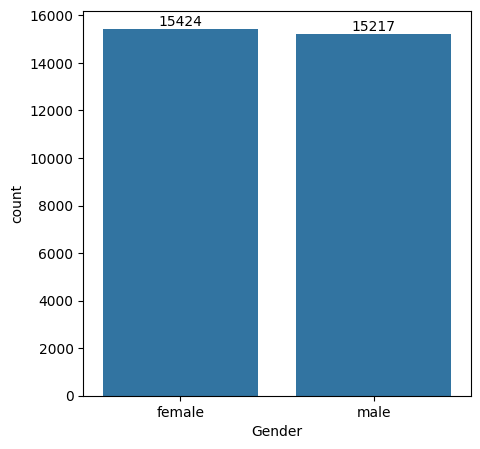

In [24]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=data, x="Gender")
ax.bar_label(ax.containers[0])
plt.show()

*analysing the marks of the student on teh basis of parents education*

In [25]:
gb = data.groupby('ParentEduc').agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


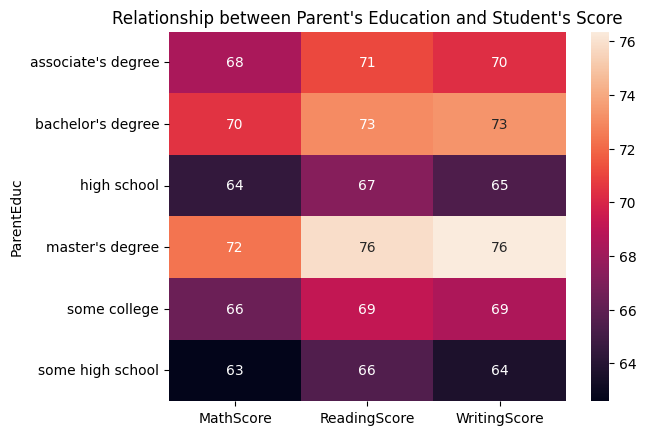

In [28]:
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

In [30]:
gm = data.groupby('ParentMaritalStatus').agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gm)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


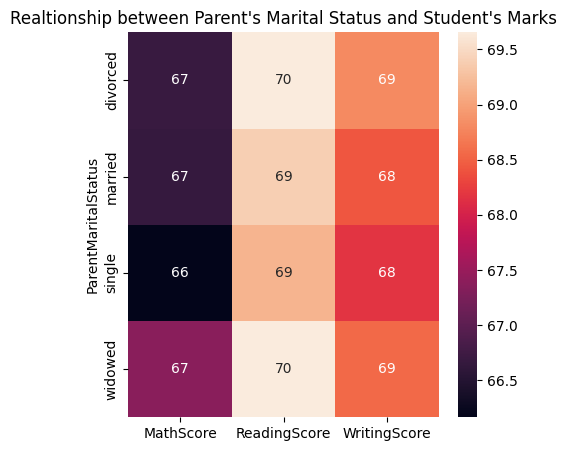

In [31]:
plt.figure(figsize=(5, 5))
sns.heatmap(gm, annot=True)
plt.title("Realtionship between Parent's Marital Status and Student's Marks")
plt.show()